<a href="https://colab.research.google.com/github/NoahLee99/Data-Science-studylog/blob/main/2%EC%A3%BC%EC%B0%A8_%EB%AF%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rc('font',family='Malgun Gothic')

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.3 MB/s eta 0:00:00


(91335, 39)

## Q1. 전국 시도별 약국수를 구해주세요!

상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다. 다음의 결과가 나오도록 구합니다.

In [2]:
# 대부분의 경우 value_counts() 함수를 통해 빈도수를 구했습니다!
df.loc[df["상권업종소분류명"] == "약국", "시도명"].value_counts()

,count
시도명,
경기도,4510
서울특별시,3579
부산광역시,1130
경상남도,1017
인천광역시,1002
경상북도,915
대구광역시,870
전라북도,862
충청남도,830


In [3]:
# 블러님께서 '행정구역'을 통해 범위를 설정하여 최종 결과 값은 조금 오차가 있지만 lambda를 사용해 미션을 수행한 것이 인상깊었습니다!
# 보다 직관적이고 짧은 코드를 제작하고 싶어 lambda를 사용하셨다고 합니다!

df['행정구역'] = df['도로명주소'].apply(lambda x: x.split()[0])
cvs_filtered = df[df['상권업종소분류코드'] == 'S02A01']
fcvs=cvs_filtered.groupby('행정구역').size()
fcvs

# ['경기도','서울특별시','부산광역시','경상남도','인천광역시','경상북도','대구광역시','전라북도','충청남도','전라남도','강원도','광주광역시','충청북도','대전광역시','울산광역시','제주특별자치도','세종특별자치시']

,0
행정구역,
강원도,729
경기도,4560
경상남도,1030
경상북도,915
광주광역시,691
대구광역시,870
대전광역시,603
부산광역시,1130
서울특별시,3579


<Axes: xlabel='시도명'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) m

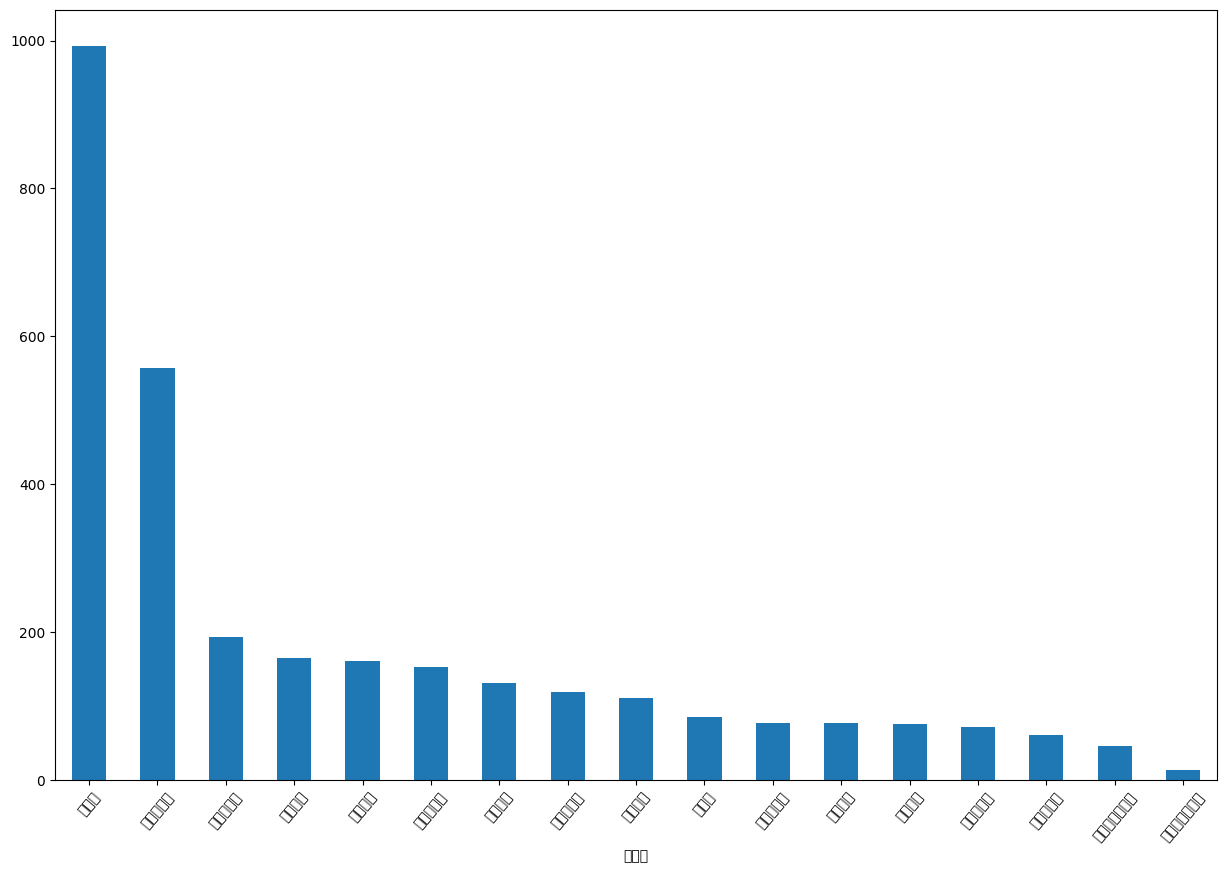

In [4]:
# 범진님께서 추가적으로 진행한 시각화입니다!
n = df.loc[df["상권업종소분류명"] == "동물병원", "시도명"].value_counts()
n.plot.bar(figsize=(15, 10), rot=50)

## Q2.
여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요! 다음의 결과가 나오도록 구합니다.

In [5]:
df.loc[df["상권업종소분류명"] == "동물병원", "시도명"].value_counts()

,count
시도명,
경기도,992
서울특별시,557
인천광역시,193
경상북도,165
경상남도,161
부산광역시,153
충청남도,131
대구광역시,119
전라북도,111


<Axes: xlabel='시도명'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) m

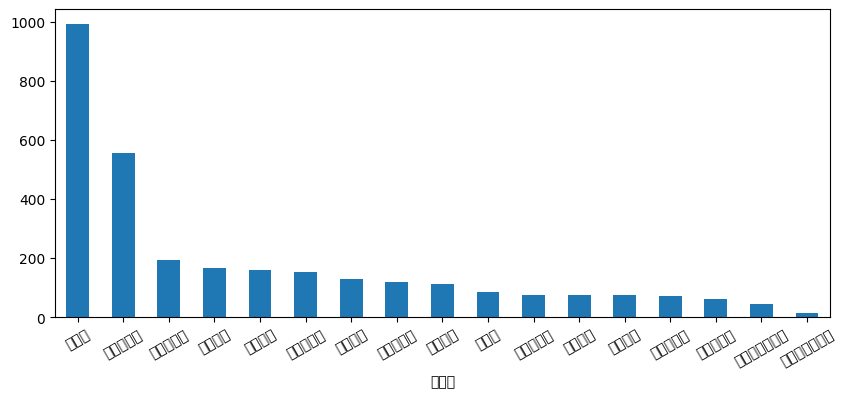

In [6]:
df.loc[df["상권업종소분류명"] == "동물병원", "시도명"].value_counts().plot.bar(figsize=(10, 4), rot=30)

       행정구역  COUNT
0       강원도     85
1       경기도   1000
2      경상남도    163
3      경상북도    165
4     광주광역시     71
5     대구광역시    119
6     대전광역시     77
7     부산광역시    153
8     서울특별시    557
9   세종특별자치시     13
10    울산광역시     61
11    인천광역시    194
12     전라남도     77
13     전라북도    111
14  제주특별자치도     46
15     충청남도    131
16     충청북도     75


Text(0.0, 1.0, '행정구역 별 동물병원 수')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DO

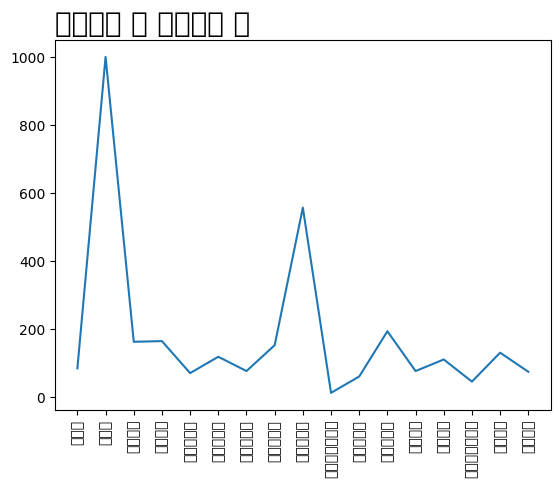

In [7]:
# 블러님께서 '동물병원'이라는 텍스트가 아닌 '동물병원'의 분류코드를 사용하여 필터링을 진행하였고,
# 막대그래프가 아닌 꺾은 선 그래프를 통해 시각화 해주셨습니다!
# 블러님을 통해 데이터프레임에서 인덱싱 된 코드를 사용하여 필터링을 할 수도 있다라는 새로운 접근법을 팀원 모두가 배웠습니다!

# df.head(50)
# 동물병원 코드 : S04A02

from matplotlib import pyplot as plt
import numpy as np

vvs_filtered = df[df['상권업종소분류코드'] == 'S04A02']
fvvs=vvs_filtered.groupby('행정구역').size().reset_index(name="COUNT")
print(fvvs)

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xticks(rotation=90)
plt.plot('행정구역','COUNT',data=fvvs)
plt.title('행정구역 별 동물병원 수', loc = 'left', fontsize = 20, fontweight = 'bold')


## Q3.
강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
비율이 높은 순서대로 정렬되게 구해주세요!
수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [8]:
seoul_hospitals = df[df["시도명"] == "서울특별시"] # 서울특별시의 병원으로 범위 설정
filtered_hospitals = seoul_hospitals[seoul_hospitals["상권업종소분류명"].str.contains("피부|성형")] # "피부" or "성형"이 들어간 병원을 필터링

total_hospitals_count = seoul_hospitals["시군구명"].value_counts() # 시군구별 전체 병원 수 계산
filtered_hospitals_count = filtered_hospitals["시군구명"].value_counts() # 시군구별 피부과 or 성형외과 병원 수 계산
ratio_count = (filtered_hospitals_count / total_hospitals_count).round(2) # 피부과 or 성형외과 수 / 전체 병원 수

sorted_ratio_count = ratio_count.sort_values(ascending=False) # 비율이 높은 순서대로 정렬
print(sorted_ratio_count)

시군구명
강남구     0.19
서초구     0.13
마포구     0.06
강서구     0.05
서대문구    0.05
중구      0.05
영등포구    0.05
양천구     0.05
송파구     0.05
강동구     0.05
은평구     0.04
성북구     0.04
성동구     0.04
중랑구     0.04
노원구     0.04
구로구     0.04
광진구     0.04
관악구     0.03
동작구     0.03
금천구     0.03
용산구     0.03
강북구     0.03
동대문구    0.02
종로구     0.02
도봉구     0.01
Name: count, dtype: float64


In [9]:
# 이번에도 블러님께서 lambda를 사용하였습니다!
# 비율(ratio)뿐만 아니라 병원의 수도 함께 출력된다는 점이 인상깊었습니다!
seoul = df[df['행정구역'] == '서울특별시']
seoul['시군구명']=seoul['도로명주소'].apply(lambda x: x.split()[1])
seoul_filter=seoul.groupby('시군구명').size().reset_index(name="whole")

cosmetic_condition = seoul['상권업종소분류명'].str.contains('피부|성형', regex=True)

cosmetic_count = seoul[cosmetic_condition].groupby('시군구명').size().reset_index(name="cosmetic")
seoul_filter = pd.merge(seoul_filter, cosmetic_count, on='시군구명', how='left').fillna(0)

seoul_filter['비율']=round(seoul_filter["cosmetic"]/seoul_filter["whole"],2)

seoul_result=seoul_filter.sort_values(by='비율', ascending=False)
print(seoul_result)

    시군구명  whole  cosmetic    비율
0    강남구   3120       603  0.19
14   서초구   1491       200  0.13
12   마포구    649        40  0.06
3    강서구    799        38  0.05
13  서대문구    543        29  0.05
23    중구    576        31  0.05
19  영등포구    731        39  0.05
18   양천구    574        26  0.05
17   송파구   1021        48  0.05
1    강동구    703        37  0.05
21   은평구    739        31  0.04
16   성북구    708        28  0.04
15   성동구    482        17  0.04
24   중랑구    497        21  0.04
8    노원구    741        26  0.04
6    구로구    451        17  0.04
5    광진구    935        37  0.04
4    관악구    578        17  0.03
11   동작구    489        14  0.03
7    금천구    303         9  0.03
20   용산구    361        10  0.03
2    강북구    396        12  0.03
10  동대문구   1152        27  0.02
22   종로구    492        11  0.02
9    도봉구    412         5  0.01


<ipython-input-9-450bbd56db0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul['시군구명']=seoul['도로명주소'].apply(lambda x: x.split()[1])


## Q4.
평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
folium 문서 : https://python-visualization.github.io/folium/quickstart.html

In [10]:
# Case 1.
import folium # 지도 시각화를 위해 folium 환경 구축

filtered_hospitals = df[df["상권업종소분류명"].str.contains("노인|치매")] # "노인" or "치매병원" 특정어 필터링

m = folium.Map(location=[37.5665, 126.9780], zoom_start=7) # 서울의 좌표로 지도 초기화

for i, row in filtered_hospitals.iterrows(): # 병원 위치 마커 추가
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)
m

In [11]:
# Case 2. 서울의 실제 좌표값으로 folium을 실행하면 지도가 잘려 보다 직관적으로 시각화 할 수 있는 좌표를 설정함
elderly=df[df['상권업종소분류명'].str.contains('노인/치매병원', regex=True)]

import folium
m = folium.Map([36.332165597, 127.434310227],zoom_start=7)
for _, row in elderly.iterrows():
    folium.Marker(location=[row['위도'],row["경도"]]).add_to(m)

m.save("map1.html")
m